The United States Department of Agriculture (USDA) Natural Resources Conservation Service (NRCS) has identified a soil classification system that consists of 12 soil textural classes based on the relative composition of sand, silt, and clay particles. The proportion of sand, silt, and clay content determines the water retention, drainage, aeration, and nutrient-holding capacity of a soil. 

The Soil Textural Triangle is a tool commonly used to visually represent these classifications. These classes include sandy clay, silty clay, clay, sandy clay loam, clay loam, silty clay loam, sandy loam, loam, silt loam, silt, loamy sand, and sand.  

**Sand**: These are the coarsest particles, with a diameter ranging from 0.05 to 2.0 millimeters. Sand particles are gritty when rubbed between fingers and do not form a ball when moistened. Sand contributes to good drainage and aeration of the soil but has a low capacity to hold nutrients and water.

**Silt**: Silt particles are finer than sand, with a diameter ranging from 0.002 to 0.05 millimeters. Silt feels smooth when dry and silky when wet. It has a greater ability than sand to hold water and nutrients, but is less aerated than sand.

**Clay**: These are the finest soil particles, with a diameter of less than 0.002 millimeters. Clay is sticky and plastic when wet and can be rolled into thin ribbons. When dry, it becomes very hard and can forms well-aggregated and cohesive clods. Clay has a high nutrient and water-holding capacity but excessive clay contents often lead to problems associated with poor infiltration, drainage, and aeration.

In this exercise we will write code to automate the determination of the soil textural class of any given soil based on the percent of sand and clay content. Since this code will have lots of fixed ranges and rules, a function seems to be the right appraoch, so that we do this heavy and tedius task only once and then we re-use the code as needed.


In [45]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


In [46]:
def find_soil_textural_class(sand,clay):
    """
    Function that returns the USDA-NRCS soil textural class given 
    the percent sand and clay.
    
    Parameters:
    sand (float, integer): Sand content as a percentage  
    clay (float, integer): Clay content as a percentage
    
    Returns:
    string: One of the 12 soil textural classes
    
    Authors:
    Andres Patrignani
    
    Date created:
    12 Jan 2024
    
    Source:
    E. Benham and R.J. Ahrens, W.D. 2009. 
    Clarification of Soil Texture Class Boundaries. 
    Nettleton National Soil Survey Center, USDA-NRCS, Lincoln, Nebraska.
    """
    
    if not isinstance(sand, (int, float, np.int64)):
        raise TypeError(f"Input type {type(sand)} is not valid.")

    try:
        # Determine silt content
        silt = 100 - sand - clay
        
        if sand + clay > 100:
            raise Exception('Inputs add over 100%')
        elif sand < 0 or clay < 0:
            raise Exception('One or more inputs are negative')
            
    except ValueError as e:
        return f"Invalid input: {e}"
    
    # Classification rules
    if silt + 1.5*clay < 15:
        textural_class = 'sand'

    elif silt + 1.5*clay >= 15 and silt + 2*clay < 30:
        textural_class = 'loamy sand'

    elif (clay >= 7 and clay < 20 and sand > 52 and silt + 2*clay >= 30) or (clay < 7 and silt < 50 and silt + 2*clay >= 30):
        textural_class = 'sandy loam'

    elif clay >= 7 and clay < 27 and silt >= 28 and silt < 50 and sand <= 52:
        textural_class = 'loam'

    elif (silt >= 50 and clay >= 12 and clay < 27) or (silt >= 50 and silt < 80 and clay < 12):
        textural_class = 'silt loam'

    elif silt >= 80 and clay < 12:
        textural_class = 'silt'

    elif clay >= 20 and clay < 35 and silt < 28 and sand > 45:
        textural_class = 'sandy clay loam'

    elif clay >= 27 and clay < 40 and sand > 20 and sand <= 45:
        textural_class = 'clay loam'

    elif clay >= 27 and clay < 40 and sand <= 20:
        textural_class = 'silty clay loam'

    elif clay >= 35 and sand > 45:
        textural_class = 'sandy clay'

    elif clay >= 40 and silt >= 40:
        textural_class = 'silty clay'

    elif clay >= 40 and sand <= 45 and silt < 40:
        textural_class = 'clay'

    else:
        textural_class = 'unknown' # in case we failed to catch any errors earlier

    return textural_class


In [47]:
# Calculate soil texture for a trivial case
sand = 100
clay = 0
find_soil_textural_class(sand,clay)


'sand'

In [48]:
# Let's create some random soils
N = 50
np.random.seed(1)
clay_list = np.random.randint(0, 60, N) # Hard to find soils with >60% clay
sand_list = np.random.randint(0, 100-clay_list, N) # Ensure sum is <= 100%
silt_list = 100 - clay_list - sand_list

# Inspect list
clay_list


array([37, 43, 12,  8,  9, 11,  5, 15,  0, 16,  1, 12,  7, 45,  6, 25, 50,
       20, 37, 18, 20, 11, 42, 28, 29, 14, 50,  4, 23, 23, 41, 49, 55, 30,
       32, 22, 13, 41,  9,  7, 22, 57,  1,  0, 17,  8, 24, 13, 51, 47])

In [49]:
# Classify the soils using the function we just created
soil_textural_class = []
for sand,clay in zip(sand_list,clay_list):
    current_class = find_soil_textural_class(sand,clay)
    

In [50]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib._cm import _Set3_data
from mpltern.datasets import soil_texture_classes

# Install mpltern library using the following command:
# !pip install mpltern

# THe code below was obtained directly from the following website (mpltern docs):
# Source: https://mpltern.readthedocs.io/en/latest/gallery/miscellaneous/soil_texture.html#sphx-glr-gallery-miscellaneous-soil-texture-py
# All teh credit for this wonderful library goes to the creators of the mpltern library

def calculate_centroid(vertices):
    """Calculte the centroid of a polygon.

    https://en.wikipedia.org/wiki/Centroid#Of_a_polygon

    Parameters
    ----------
    vertices : (n, 2) np.ndarray
        Vertices of a polygon.

    Returns
    -------
    centroid : (2, ) np.ndarray
        Centroid of the polygon.
    """
    roll0 = np.roll(vertices, 0, axis=0)
    roll1 = np.roll(vertices, 1, axis=0)
    cross = np.cross(roll0, roll1)
    area = 0.5 * np.sum(cross)
    return np.sum((roll0 + roll1) * cross[:, None], axis=0) / (6.0 * area)


def plot_soil_texture_classes(ax):
    """Plot soil texture classes."""
    classes = soil_texture_classes

    for (key, value), color in zip(classes.items(), _Set3_data):
        tn0, tn1, tn2 = np.array(value).T
        patch = ax.fill(tn0, tn1, tn2, ec="k", fc=color, alpha=0.6, zorder=2.1)
        centroid = calculate_centroid(patch[0].get_xy())

        # last space replaced with line break
        label = key[::-1].replace(" ", "\n", 1)[::-1].capitalize()

        ax.text(centroid[0], centroid[1], label, 
                ha="center", va="center", transform=ax.transData,
        )

    ax.taxis.set_major_locator(MultipleLocator(10.0))
    ax.laxis.set_major_locator(MultipleLocator(10.0))
    ax.raxis.set_major_locator(MultipleLocator(10.0))

    ax.taxis.set_minor_locator(AutoMinorLocator(2))
    ax.laxis.set_minor_locator(AutoMinorLocator(2))
    ax.raxis.set_minor_locator(AutoMinorLocator(2))

    ax.grid(which="both")

    ax.set_tlabel("Clay (%)")
    ax.set_llabel("Sand (%)")
    ax.set_rlabel("Silt (%)")

    ax.taxis.set_ticks_position("tick2")
    ax.laxis.set_ticks_position("tick2")
    ax.raxis.set_ticks_position("tick2")


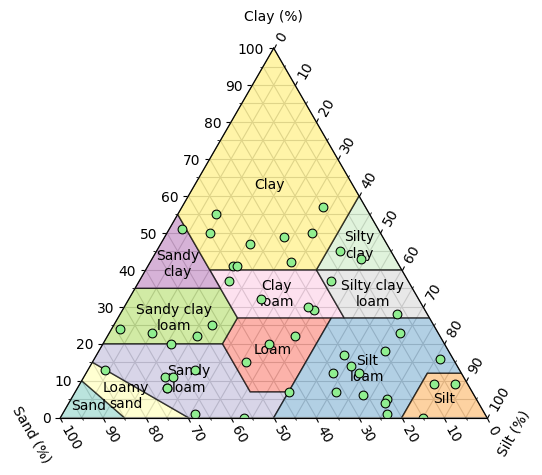

In [51]:
# Create triagnle with our random samples overlaid

ax = plt.subplot(projection="ternary", ternary_sum=100.0)
plot_soil_texture_classes(ax)
ax.scatter(clay_list, sand_list, silt_list, zorder=3, marker='o',
           s=40, facecolor='lightgreen', edgecolor='k', linewidth=0.75)
plt.show()


## References 
- Benham E., Ahrens, R.J., and Nettleton, W.D. (2009). Clarification of Soil Texture Class Boundaries. Nettleton National Soil Survey Center, USDA-NRCS, Lincoln, Nebraska.

- Yuji Ikeda. (2023). yuzie007/mpltern: 1.0.2 (1.0.2). Zenodo. https://doi.org/10.5281/zenodo.8289090